<a href="https://colab.research.google.com/github/SalahKhattab74/-World-Cup-Expectation/blob/main/FifaWorldCup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#Load_data
world_cup = pd.read_csv('World Cup 2018 Dataset.csv')
results = pd.read_csv('results.csv')


In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [ ]:
#Add goal difference and establishing who is the winner 
winner =[]
for i in range(len(results['home_team'])):
  if results['home_score'][i]> results['away_score'][i]:
    winner.append(results['home_team'][i])
  elif results['home_score'][i]< results['away_score'][i]:
    winner.append(results['away_team'][i])
  else:
    winner.append('Draw')
results['winning_team'] = winner

#Adding goal Difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [ ]:
#lets work with a subset of the data one that includes games played by Egypt in a Egypt dataframe
df = results[(results['home_team'] == 'Egypt') | (results['away_team'] == 'Egypt')]
egypt = df.iloc[:]
egypt.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
38466,2017-09-05,Egypt,Uganda,1,0,FIFA World Cup qualification,Alexandria,Egypt,Egypt,1
38526,2017-10-08,Egypt,Congo,2,1,FIFA World Cup qualification,Alexandria,Egypt,Egypt,1
38632,2017-11-12,Ghana,Egypt,1,1,FIFA World Cup qualification,Kumasi,Ghana,Draw,0
38793,2018-03-23,Portugal,Egypt,2,1,Friendly,Zurich,Switzerland,Portugal,1
38867,2018-03-27,Greece,Egypt,1,0,Friendly,Zurich,Switzerland,Greece,1


In [ ]:
#creating a column for year and the first world cup was held in 1930 هيجيب السنة بتاعت كل ماتش لمصر قبل 1930 قبل اول كاس عالم 
year = []
for row in egypt['date']:
  year.append(int(row[:4]))
egypt['match_year']= year
egypt_1930 = egypt[egypt.match_year >= 1930]
egypt_1930.count()

date               605
home_team          605
away_team          605
home_score         605
away_score         605
tournament         605
city               605
country            605
winning_team       605
goal_difference    605
match_year         605
dtype: int64

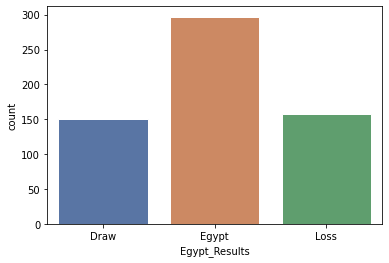

In [ ]:
#what is the common game outcome for Egypt visualisation
wins = []
for row in egypt_1930['winning_team']:
  if row != 'Egypt' and row != 'Draw':
    wins.append('Loss')
  else:
    wins.append(row)
winsdf = pd.DataFrame(wins,columns=['Egypt_Results'])
winsdf
#plotting 
fig,ax = plt.subplots(1)
sns.set(style='darkgrid')

sns.countplot(x ='Egypt_Results',data=winsdf)

In [ ]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()


date               20565
home_team          20565
away_team          20565
home_score         20565
away_score         20565
tournament         20565
city               20565
country            20565
winning_team       20565
goal_difference    20565
dtype: int64

In [ ]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,Draw,0,1930


In [ ]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()


,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [ ]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()


,home_team,away_team,winning_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


In [ ]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])



In [ ]:
# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')


In [ ]:
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.575
Test set accuracy:  0.550


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 
# Loading new datasets
ranking = pd.read_csv('fifa_rankings.csv') 
fixtures = pd.read_csv('fixtures.csv')
# List for storing the group stage games
pred_set = []


In [ ]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()


,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,25.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,60.0,10.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,28.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,14.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [ ]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
#هنعمل لوب تعدي علي الفرق والرانك بتاعها وتشوف الرانك الاعلي هيكون في الهوم تيم والعكس 
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()


,home_team,away_team,winning_team
0,Russia,Saudi Arabia,None
1,Uruguay,Egypt,None
2,Iran,Morocco,None
3,Portugal,Spain,None
4,France,Australia,None


In [ ]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()


,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia-Herzegovina,home_team_Botswana,home_team_Brazil,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burma,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cape Verde,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China,home_team_Colombia,home_team_Congo,home_team_Congo DR,...,away_team_Solomon Islands,away_team_South Africa,away_team_Spain,away_team_Sri Lanka,away_team_St Kitts and Nevis,away_team_St Lucia,away_team_St Vincent and the Grenadines,away_team_Sudan,away_team_Suriname,away_team_Swaziland,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Taiwan,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_USA,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 0] + " and " + backup_pred_set.iloc[i, 1])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")


Russia and Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.707
Probability of Draw:  0.194
Probability of Saudi Arabia winning:  0.099

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.615
Probability of Draw:  0.318
Probability of Egypt winning:  0.067

Iran and Morocco
Draw
Probability of Iran winning:  0.217
Probability of Draw:  0.413
Probability of Morocco winning:  0.369

Portugal and Spain
Draw
Probability of Portugal winning:  0.298
Probability of Draw:  0.356
Probability of Spain winning:  0.346

France and Australia
Winner: France
Probability of France winning:  0.655
Probability of Draw:  0.213
Probability of Australia winning:  0.133

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.858
Probability of Draw:  0.112
Probability of Iceland winning:  0.030

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.430
Probability of Draw:  0.175
Probability of Denmark winning:  0.395

Croatia and Nigeria
Winner: 